# Challenge di prova 2: telco churn - Riccardo Moglioni

## Training

In [1]:
!pip install pandas
!pip install scikit-learn
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

In [2]:
# Lettura dei file csv
train_path = "train.csv"
train = pd.read_csv(train_path)

test_path = "test.csv"
test = pd.read_csv(test_path)

In [3]:
# Visualizzo i dati
# Non utilizzo .head() in quanto i primi valori (o gli ultimi con tail()) 
# non contengono valori nulli. Ho scelto questa porzione in quanto più 
# rappresentativa del dataset
train[72:77]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
72,9415-TPKRV,Female,0,Yes,Yes,8,Yes,Yes,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,55.75,446.8,No
73,0487-CRLZF,Female,0,No,No,49,Yes,No,DSL,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),74.45,3721.9,No
74,6603-QWSPR,Female,0,No,No,46,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),104.40,4904.2,No
75,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
76,3594-BDSOA,Female,0,Yes,No,24,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),20.40,482.8,No


In [4]:
# Ci sono dei valori mancanti nella colonna TotalCharges

# Controllo sullo shape per verificare la corretta creazione di test e train
print("Train shape:",train.shape)
print("Test shape:",test.shape)
print("Total row:",train.shape[0]+test.shape[0])

Train shape: (4507, 21)
Test shape: (1127, 21)
Total row: 5634


In [5]:
# Calcolo dei valori missing in funzione delle colonne
train_missing_values_count = train.isnull().sum()
print(train_missing_values_count)
test_missing_values_count = test.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [6]:
# Eppure TotalCharges ha un valore mancante

In [7]:
# Calcolo dei valori missing in funzione dello spazio
missing_values_count = (train==' ').sum()
missing_values_count

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        8
Churn               0
dtype: int64

In [8]:
# I valori mancanti sono rappresentati da uno spazio ed in totale sono 10 (8 in train +2 in test)

In [9]:
train['Churn'].describe()

count     4507
unique       2
top         No
freq      3296
Name: Churn, dtype: object

In [10]:
# Creazione degli insiemi X e y sia per test che per training.
# Il customerID è ridondante all'indice, lo elimino
train_file_y = train.Churn
train_file_X = train.drop(['Churn','customerID'], axis=1)

test_file_y = test.Churn
test_file_X = test.drop(['Churn','customerID'], axis=1)

print("X train shape:",train_file_X.shape)
print("y train shape:",train_file_y.shape)
print("X test shape:",test_file_X.shape)
print("y test shape:",test_file_y.shape)

X train shape: (4507, 19)
y train shape: (4507,)
X test shape: (1127, 19)
y test shape: (1127,)


In [11]:
# Funzione che data una colonna contenente valori yes/no li converte in 1/0
def ynTransform(x):
    for n in x.keys():
        if x[n].strip()=='Yes':
            x[n]=1
        elif x[n].strip()=='No':
            x[n]=0

In [12]:
# Applicazione della funzione precedente ad y
ynTransform(train_file_y)
ynTransform(test_file_y)

In [13]:
train_file_y.describe()

count     4507
unique       2
top          0
freq      3296
Name: Churn, dtype: int64

In [14]:
totalColunm = train.columns
totalColunm

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [15]:
# Visualizzo il numero di valori unici nelle colonne per capire la loro composizione.
# Per semplicità di rappresentazione riporto solo train (è stata confrontato con test)
for c in totalColunm:
    print('-------------------------------------')
    print(train[c].describe())

-------------------------------------
count           4507
unique          4507
top       1465-LNTLJ
freq               1
Name: customerID, dtype: object
-------------------------------------
count     4507
unique       2
top       Male
freq      2299
Name: gender, dtype: object
-------------------------------------
count    4507.000000
mean        0.159308
std         0.366003
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: SeniorCitizen, dtype: float64
-------------------------------------
count     4507
unique       2
top         No
freq      2323
Name: Partner, dtype: object
-------------------------------------
count     4507
unique       2
top         No
freq      3167
Name: Dependents, dtype: object
-------------------------------------
count    4507.000000
mean       32.171955
std        24.487239
min         0.000000
25%         9.000000
50%        28.000000
75%        55.000000
max        72.000000
Name: tenure, d

In [16]:
# La maggior parte delle colonne yes/no in realtà presentano un terzo valore

# Identificop quelle con valori esclusivamente yes/no 
ynColumns = ["Partner","Dependents","PhoneService","PaperlessBilling"]

In [17]:
# Trasformazione dei valori yes/no in 1/0
for c in ynColumns:
    ynTransform(train_file_X[c])
    ynTransform(test_file_X[c])

In [18]:
# Visualizzo la tabella ottenuta
train_file_X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,1,0,0,2,1,No,DSL,No,No,No,No,No,No,Month-to-month,0,Electronic check,43.95,85.1
1,Female,0,1,1,64,1,Yes,Fiber optic,Yes,No,No,Yes,No,No,Month-to-month,1,Bank transfer (automatic),86.80,5327.25
2,Male,0,1,1,2,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,0,Mailed check,20.30,40.25
3,Male,0,1,0,71,1,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,0,Electronic check,83.20,6126.1
4,Female,1,0,0,51,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,0,Credit card (automatic),19.60,967.9


In [19]:
# Le colonne risultano in parte numeriche ed in parte non numeriche (categoriche)
# Dopo averle individuate le separo
notNumericalColumn = ["gender","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaymentMethod"]
trainXnum = train_file_X.drop(notNumericalColumn, axis=1)
testXnum = test_file_X.drop(notNumericalColumn, axis=1)
print(trainXnum[72:77])
numericalColumn = train_file_X.columns.drop(notNumericalColumn)
print("/n",numericalColumn)
trainXnotNum = train_file_X.drop(numericalColumn, axis=1)
testXnotNum = test_file_X.drop(numericalColumn, axis=1)

    SeniorCitizen Partner Dependents  tenure PhoneService PaperlessBilling  \
72              0       1          1       8            1                0   
73              0       0          0      49            1                1   
74              0       0          0      46            1                1   
75              0       1          1       0            1                0   
76              0       1          0      24            1                0   

    MonthlyCharges TotalCharges  
72           55.75        446.8  
73           74.45       3721.9  
74          104.40       4904.2  
75           20.00               
76           20.40        482.8  
/n Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')


In [20]:
# Le righe nella colonna TotalCharges hanno valori mancanti

# Sostituzione dei valori mancanti "spazio" con none
for n in trainXnum['TotalCharges'].keys():
        if trainXnum['TotalCharges'][n]==' ':
            trainXnum['TotalCharges'][n]=None

for n in testXnum['TotalCharges'].keys():
        if testXnum['TotalCharges'][n]==' ':
            testXnum['TotalCharges'][n]=None

In [21]:
# Definisco un imputer per i valori null (10 valori in tutto)
# Imputation
my_imputer = SimpleImputer()
train_imputed_X_num = pd.DataFrame(my_imputer.fit_transform(trainXnum))
test_imputed_X_num = pd.DataFrame(my_imputer.transform(testXnum))

# L'imputation rimuove il nome delle colonne, le rimetto
train_imputed_X_num.columns = trainXnum.columns
test_imputed_X_num.columns = testXnum.columns

In [22]:
# Ora le 10 righe di TotalCharges hanno tutte dei valori
# Calcolo dei valori missing in funzione delle colonne
train_missing_values_count = train_imputed_X_num.isnull().sum()
print(train_missing_values_count)

SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
PaperlessBilling    0
MonthlyCharges      0
TotalCharges        0
dtype: int64


In [23]:
train_imputed_X_num[72:77]

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges
72,0.0,1.0,1.0,8.0,1.0,0.0,55.75,446.800000
73,0.0,0.0,0.0,49.0,1.0,1.0,74.45,3721.900000
74,0.0,0.0,0.0,46.0,1.0,1.0,104.40,4904.200000
75,0.0,1.0,1.0,0.0,1.0,0.0,20.00,2283.244176
76,0.0,1.0,0.0,24.0,1.0,0.0,20.40,482.800000


In [24]:
# Come si può vedere la colonna TotalCharges ha ora tutti i valori settati

In [25]:
# Inizio a lavorare sui valori non numerici
trainXnotNum

,gender,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod
0,Female,No,DSL,No,No,No,No,No,No,Month-to-month,Electronic check
1,Female,Yes,Fiber optic,Yes,No,No,Yes,No,No,Month-to-month,Bank transfer (automatic)
2,Male,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Mailed check
3,Male,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,Electronic check
4,Female,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Credit card (automatic)
...,...,...,...,...,...,...,...,...,...,...,...
4502,Female,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Electronic check
4503,Female,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Electronic check
4504,Male,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Bank transfer (automatic)
4505,Female,No,DSL,Yes,No,No,Yes,No,No,Month-to-month,Credit card (automatic)


In [26]:
# Separazione della tabella dei valori categorici in label e oneHot
# in funzione delle due codifiche da applicare

# Le colonne seguenti sono state selezionate per la one hot in quanto non 
# ho ritenuto i valori classificabili in un qualche ordine di grandezza
oneHotColumn = ["gender","Contract","PaymentMethod"]

# Al resto dei valori verrà applicata una label che assegnerà un valore 
# incrementale con la logica: "no ..." < "no" < "yes" ed in base alla qualità
# della connessione internet ("no" < "DSL" < "Fiber optic")
labelColumn = trainXnotNum.columns.drop(oneHotColumn)
labelColumn

Index(['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

In [27]:
# Ottengo le colonne di X per la OH
trainXOH = trainXnotNum.drop(labelColumn, axis=1)
testXOH = testXnotNum.drop(labelColumn, axis=1)

# Applico la one hot alle colonne
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
trainXOH_cols = pd.DataFrame(OH_encoder.fit_transform(trainXOH))
testXOH_cols = pd.DataFrame(OH_encoder.transform(testXOH))

# La codifica one hot rimuove gli indici li rimetto definendo anche le nuove colonne
trainXOH_cols.index = trainXOH.index
testXOH_cols.index = testXOH.index
trainXOH_cols.columns = ["Female","Male","Contract-MtoM","Contract-1y","Contract-2y","Payment:Bank transfer","Payment:Credit card","Payment:Electronic check","Payment:Mailed check"]
testXOH_cols.columns = ["Female","Male","Contract-MtoM","Contract-1y","Contract-2y","Payment:Bank transfer","Payment:Credit card","Payment:Electronic check","Payment:Mailed check"]
trainXOH_cols

,Female,Male,Contract-MtoM,Contract-1y,Contract-2y,Payment:Bank transfer,Payment:Credit card,Payment:Electronic check,Payment:Mailed check
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
4502,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4503,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4504,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4505,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [28]:
# Ricavo le colonne su cui fare la label
trainXlabel = trainXnotNum.drop(oneHotColumn, axis=1)
testXlabel = testXnotNum.drop(oneHotColumn, axis=1)

trainXlabel

,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,No,DSL,No,No,No,No,No,No
1,Yes,Fiber optic,Yes,No,No,Yes,No,No
2,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
3,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes
4,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
...,...,...,...,...,...,...,...,...
4502,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
4503,Yes,Fiber optic,No,No,No,No,Yes,Yes
4504,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
4505,No,DSL,Yes,No,No,Yes,No,No


In [29]:
# Funzione che applica la label assegnando i valori nell'ordine indicato in precedenza
def labelTransform(x):
    for n in x.keys():
        if x[n].startswith("No "):
            x[n]=0
        elif x[n].strip()=='Yes':
            x[n]=2
        elif x[n].strip()=='No':
            x[n]=1

In [30]:
# Estrazione della colonna InternetService e applicazione della funzione
# precedente alle colonne restanti
train_internet = trainXlabel.InternetService
test_internet = testXlabel.InternetService

train_label_X = trainXlabel.copy().drop("InternetService", axis=1)
test_label_X = testXlabel.copy().drop("InternetService", axis=1)

for n in train_label_X.columns:
    labelTransform(train_label_X[n])
    labelTransform(test_label_X[n])
train_label_X

,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,1,1,1,1,1,1,1
1,2,2,1,1,2,1,1
2,1,0,0,0,0,0,0
3,2,2,1,2,2,2,2
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
4502,1,0,0,0,0,0,0
4503,2,1,1,1,1,2,2
4504,2,0,0,0,0,0,0
4505,1,2,1,1,2,1,1


In [31]:
# Funzione che applica la label alla connessione internet assegnando i valori nell'ordine indicato in precedenza
def internetTransform(x):
    for n in x.keys():
        if x[n].strip()=='No':
            x[n]=0
        elif x[n].strip()=='DSL':
            x[n]=1
        elif x[n].strip()=='Fiber optic':
            x[n]=2

In [32]:
# Trasformazione dei valori InternetService tramite la funzione precedente
internetTransform(train_internet)
internetTransform(test_internet)
print(train_internet)

0       1
1       2
2       0
3       1
4       0
       ..
4502    0
4503    2
4504    0
4505    1
4506    2
Name: InternetService, Length: 4507, dtype: object


In [33]:
# ora occorre concatenare tutte le tabelle elaborate

# concateno la tabella internet con la tabella delle label yes/no/no...,
# riunendo così tutte le colonne su cui si è fatta una label
train_labeled_X = pd.concat([train_internet, train_label_X], axis=1)
test_labeled_X = pd.concat([test_internet, test_label_X], axis=1)

# concateno la tabella labeled_X con la tabella XOH_cols delle OneHot,
# riunendo così tutte le colonne su cui si trovavano valori non numerici
train_notNumerical_X = pd.concat([train_labeled_X, trainXOH_cols], axis=1)
test_notNumerical_X = pd.concat([test_labeled_X, testXOH_cols], axis=1)

# concateno la tabella notNumerical_X con la tabella imputed_X_num in cui 
# si trovano i valori numerici, riunendo così tutte le colonne
train_X_result = pd.concat([train_notNumerical_X, train_imputed_X_num], axis=1)
test_X_result = pd.concat([test_notNumerical_X, test_imputed_X_num], axis=1)

In [34]:
train_X_result.head()

,InternetService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Female,Male,...,Payment:Electronic check,Payment:Mailed check,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges
0,1,1,1,1,1,1,1,1,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,43.95,85.10
1,2,2,2,1,1,2,1,1,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,64.0,1.0,1.0,86.80,5327.25
2,0,1,0,0,0,0,0,0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,2.0,1.0,0.0,20.30,40.25
3,1,2,2,1,2,2,2,2,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,71.0,1.0,0.0,83.20,6126.10
4,0,1,0,0,0,0,0,0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,51.0,1.0,0.0,19.60,967.90


In [35]:
# dato l'insieme di training effettuiamo uno split per generare l'insieme di validation
X_train, X_val, y_train, y_val = train_test_split(
    train_X_result, 
    train_file_y, 
    stratify=train_file_y, 
    train_size=0.8, 
    test_size=0.2, 
    random_state=42
)

In [36]:
y_train.describe()

count     3605
unique       2
top          0
freq      2636
Name: Churn, dtype: int64

In [37]:
# Ottengo un errore nei valori di y nel classificatore dovuto al tipo di valore
# che pero risulta int64 per tutte le y
# Cast sui valori y per evitare problemi dovuti ad int64 nel classificatore
y_train=y_train.astype('int')
y_val=y_val.astype('int')
test_file_y=test_file_y.astype('int')
train_file_y=train_file_y.astype('int')

In [38]:
# addestramento e calcolo dell'accuracy utilizzando train e validation
classificatore = DecisionTreeClassifier(random_state=0)
classificatore.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(classificatore.score(X_train, y_train)))
print("Accuracy on validation set: {:.3f}".format(classificatore.score(X_val, y_val)))

Accuracy on training set: 0.998
Accuracy on validation set: 0.733


In [39]:
# overfitting evidente

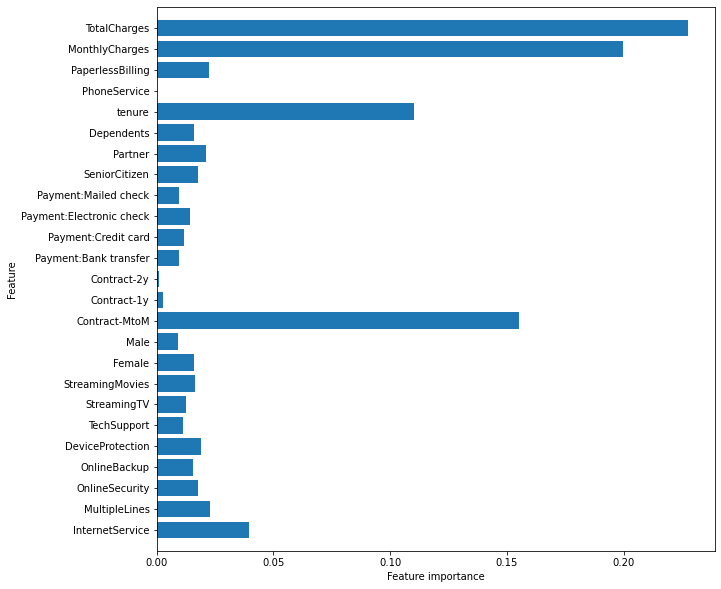

In [40]:
# Stampo un grafo per individuare l'importanza delle feature
def plot_feature_importances_churn(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(10,10))
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_churn(classificatore)

In [41]:
# solo phoneService ha importanza nulla

In [42]:
# definisco una funzione per individuare l'accuracy del validation set in base ai parametri dati
def max_lif_function(maxD, maxL, X_train, X_val, y_train, y_val):
    model = DecisionTreeClassifier(max_depth=maxD, max_leaf_nodes = maxL, random_state=42)
    model.fit(X_train, y_train)
    accuracy = model.score(X_val, y_val)
    #plot_feature_importances_churn(model)
    return(accuracy)

In [43]:
# itero il calcolo dell'accuracy al variare dei parametri e stampo il miglior valore
# i range utilizzati sono stati ottenuti iterando su intervalli sempre più piccoli e con 
# passi decrescenti
m = 0
d = 0
l = 0
for maxD in range(5,10,1):
    for maxL in range(25,35,1):
        my_accuracy = max_lif_function(maxD, maxL, X_train, X_val, y_train, y_val)*10000
        if my_accuracy > m:
            m = my_accuracy
            d = maxD
            l = maxL
print("Max leaf nodes: %d %d  \t\t Accuracy:  %d" %(d, l, m))

Max leaf nodes: 7 29  		 Accuracy:  8170


In [44]:
# max_leaf_nodes = 29

In [45]:
# max_depth=7

In [46]:
# ripeto l'addestramento utilizzando i parametri ottenuti
# addestramento e calcolo dell'accuracy utilizzando train e validation
clas = DecisionTreeClassifier(max_depth=7, max_leaf_nodes = 29, random_state=42)
clas.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(clas.score(X_train, y_train)))
print("Accuracy on validation set: {:.3f}".format(clas.score(X_val, y_val)))

Accuracy on training set: 0.807
Accuracy on validation set: 0.817


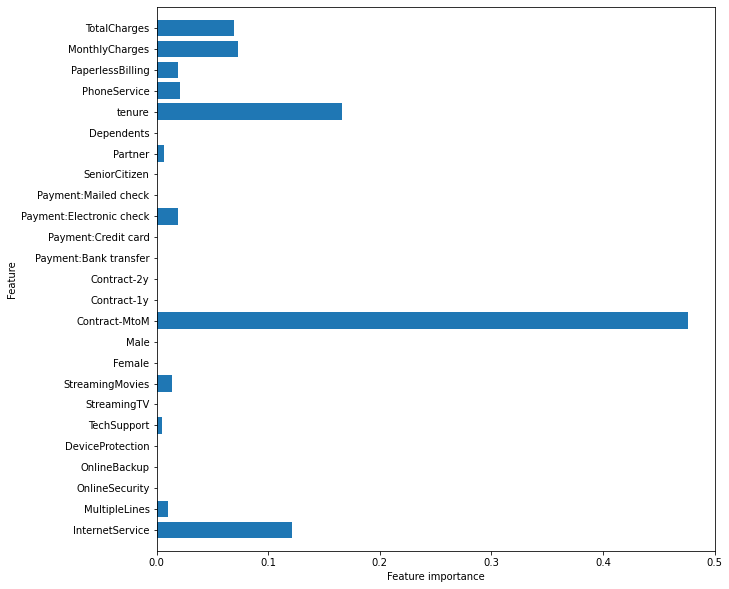

In [47]:
# visualizzo l'importanza della featurs per questo nuovo modello
plot_feature_importances_churn(clas)

In [48]:
# a fronte di un aumento dell'accuracy molte più featurs hanno importanza nulla

# stampa dell'albero ottenuto (commentata per evitare un elaborazione molto lunga)
#fig = plt.figure(figsize=(100,80))
#tree.plot_tree(clas)

In [49]:
# ripeto l'addestramento utilizzando i valori per la consegna
# addestramento e calcolo dell'accuracy utilizzando train e test
clas = DecisionTreeClassifier(max_depth=7, max_leaf_nodes = 29, random_state=42)
    # max_leaf_nodes: numero massimo di foglie generabili nell'albero
clas.fit(train_X_result, train_file_y)
print("Accuracy on training set: {:.3f}".format(clas.score(train_X_result, train_file_y)))
print("Accuracy on test set: {:.3f}".format(clas.score(test_X_result, test_file_y)))

Accuracy on training set: 0.809
Accuracy on test set: 0.793


In [50]:
# i valori non sono molto buoni